<a href="https://colab.research.google.com/github/Raptor-sj22/ML-Training/blob/main/Linear_Regression/Linear_Regression_Exercise_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Project Summary

This code performs **3rd degree polynomial regression** with **dimensionality reduction (PCA)** using **TensorFlow/Keras** to predict car fuel efficiency (MPG) based on input features: **displacement**, **model year**, and **one-hot encoded cylinder counts (4, 6, 8)**.

The input features are:
- Data Shuffled using sikit
-Expanded using `PolynomialFeatures` (degree 3),
- Normalized with `StandardScaler`,
- Reduced to 10 components using `PCA`.

The model is:
- A simple linear model (`Dense(1)`) with **L2 regularization**,
- Trained using the **Adam optimizer** with a **learning rate of 0.001**,
- Using **Mean Squared Error (MSE)** as the loss function.

Training setup:
- **1000 epochs**,
- **Batch size = 2**,
- **Early stopping** applied with a **patience of 50 epochs**,
- Data split: **80% training**, **10% validation**, **10% testing**.

After training, the model is evaluated using **RMSE**, **MAE**, and **R²** metrics. Residual analysis plots and feature impact visualizations are generated to assess model performance and prediction quality. A utility function is also provided for MPG prediction based on new inputs.



In [ ]:
#@title Install required libraries

!pip install keras \
  matplotlib \
  numpy\
  pandas \
  tensorflow

print('\n\nAll requirements successfully installed.')



All requirements successfully installed.


In [ ]:
#@title Import Packages
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from sklearn.feature_selection import mutual_info_regression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.decomposition import PCA
from sklearn.utils import shuffle
from tensorflow.keras import layers, optimizers, regularizers
import matplotlib.pyplot as plt
print(f" All Packages successfuly imported.")

 All Packages successfuly imported.


In [ ]:
#@title Defining Data
file_id = '1tmYsEsEWWvAznAT4k6vFY-qalJx-1w_t'
url = f'https://drive.google.com/uc?id={file_id}'
Original_Dataset = pd.read_csv(url)

# Shuffle the dataset
Original_Dataset = shuffle(Original_Dataset, random_state=42)

display(Original_Dataset)
Original_Dataset.info()
Original_Dataset.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
198,33.0,4,91.0,53,1795,17.4,76,3,honda civic
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger
33,19.0,6,232.0,100,2634,13.0,71,1,amc gremlin
208,13.0,8,318.0,150,3940,13.2,76,1,plymouth volare premier v8
93,14.0,8,318.0,150,4237,14.5,73,1,plymouth fury gran sedan
...,...,...,...,...,...,...,...,...,...
71,19.0,3,70.0,97,2330,13.5,72,3,mazda rx2 coupe
106,12.0,8,350.0,180,4499,12.5,73,1,oldsmobile vista cruiser
270,21.1,4,134.0,95,2515,14.8,78,3,toyota celica gt liftback
348,37.7,4,89.0,62,2050,17.3,81,3,toyota tercel


<class 'pandas.core.frame.DataFrame'>
Index: 398 entries, 198 to 102
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 31.1+ KB


,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [ ]:
#@title Create the 3D scatter plot using Plotly Express
fig = px.scatter_3d(Original_Dataset, x='cylinders', y='displacement', z='model year', color='mpg',title="Interactive 3D Scatter Plot", width=700, height=700)

# Show the plot
fig.show()

In [ ]:
#@title Mutal information analysis and Plotting the correlation matrix

xx=Original_Dataset[[ 'cylinders', 'displacement','weight','acceleration','model year']]
yy=Original_Dataset['mpg']

mi = mutual_info_regression(xx,yy)
mi_df = pd.DataFrame({'Feature': xx.columns, 'Mutual Information': mi})
mi_df = mi_df.sort_values(by='Mutual Information', ascending=False)
print(f"\nMutual Information:\n{mi_df}")

numeric_data = Original_Dataset.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
corr_matrix = numeric_data.corr()

# Plot the correlation matrix using Plotly Express
fig = px.imshow(corr_matrix,text_auto=".2f",color_continuous_scale='bluered',title='Correlation Matrix Heatmap',aspect='auto')
fig.update_layout(width=1000, height=1000)
fig.show()


Mutual Information:
        Feature  Mutual Information
1  displacement            0.787758
2        weight            0.774992
0     cylinders            0.624794
4    model year            0.340345
3  acceleration            0.198901


In [ ]:
#@title Cleaning Data

# Select all necessary columns first (no slicing)
full_clean_data = Original_Dataset[['mpg', 'cylinders', 'displacement', 'model year']]

# Keep only cylinders 4, 6, or 8 and drop any NaN values
full_clean_data = full_clean_data[full_clean_data['cylinders'].isin([4, 6, 8])].dropna()

# Shuffle the dataset
full_clean_data = shuffle(full_clean_data, random_state=42)

# Split sizes
total_samples = len(full_clean_data)
train_size = int(0.8 * total_samples)
val_size = int(0.1 * total_samples)
test_size = total_samples - train_size - val_size

# Split into train, validation, and test
clean_data = full_clean_data.iloc[:train_size]
Clean_validation_data = full_clean_data.iloc[train_size:train_size+val_size]
Clean_test_data = full_clean_data.iloc[train_size+val_size:]

# --- One-hot encoding of 'cylinders' for each set

# Training set
cylinder_binned = pd.get_dummies(clean_data['cylinders'], prefix='cyl').astype(int)
clean_data = clean_data.drop('cylinders', axis=1)
clean_data = pd.concat([clean_data, cylinder_binned], axis=1)

# Validation set
cylinder_binned_validation_data = pd.get_dummies(Clean_validation_data['cylinders'], prefix='cyl').astype(int)
Clean_validation_data = Clean_validation_data.drop('cylinders', axis=1)
Clean_validation_data = pd.concat([Clean_validation_data, cylinder_binned_validation_data], axis=1)

# Test set
cylinder_binned_test_data = pd.get_dummies(Clean_test_data['cylinders'], prefix='cyl').astype(int)
Clean_test_data = Clean_test_data.drop('cylinders', axis=1)
Clean_test_data = pd.concat([Clean_test_data, cylinder_binned_test_data], axis=1)

# --- Separate into X1, X2, X3, X4, X5, and y for training set

y = clean_data['mpg'].values
X1 = clean_data['displacement'].values
X2 = clean_data['model year'].values
X3 = clean_data['cyl_4'].values
X4 = clean_data['cyl_6'].values
X5 = clean_data['cyl_8'].values

# --- Separate into validation set

y_validation = Clean_validation_data['mpg'].values
X1_validation = Clean_validation_data['displacement'].values
X2_validation = Clean_validation_data['model year'].values
X3_validation = Clean_validation_data['cyl_4'].values
X4_validation = Clean_validation_data['cyl_6'].values
X5_validation = Clean_validation_data['cyl_8'].values

# --- Separate into test set

y_test = Clean_test_data['mpg'].values
X1_test = Clean_test_data['displacement'].values
X2_test = Clean_test_data['model year'].values
X3_test = Clean_test_data['cyl_4'].values
X4_test = Clean_test_data['cyl_6'].values
X5_test = Clean_test_data['cyl_8'].values

# Feature names
feature_names = ['X1', 'X2', 'X3', 'X4', 'X5']

# --- Display results
display(
    f"Data successfully cleaned and split.",
    f"Training Length: {len(X1)}",
    f"Validation Length: {len(X1_validation)}",
    f"Test Length: {len(X1_test)}"
)


'Data successfully cleaned and split.'

'Training Length: 312'

'Validation Length: 39'

'Test Length: 40'

In [ ]:
#@title Input the Polynomial degree and Normalization of data

degree = 3

# Prepare the input data
X_Cleaned = np.column_stack((X1, X2, X3, X4, X5))
X_Cleaned_validation = np.column_stack((X1_validation, X2_validation, X3_validation, X4_validation, X5_validation))
X_Cleaned_test = np.column_stack((X1_test, X2_test, X3_test, X4_test, X5_test))  # Assuming you have the test set

# 1. Apply PolynomialFeatures
poly = PolynomialFeatures(degree, include_bias=False)

# Fit and transform on training data, then transform validation and test data
X_poly = poly.fit_transform(X_Cleaned)  # Fit and transform on training data
X_poly_validation = poly.transform(X_Cleaned_validation)  # Transform validation data
X_poly_test = poly.transform(X_Cleaned_test)  # Transform test data

# 2. Normalize using StandardScaler
scaler = StandardScaler()

# Fit and transform on training data, then transform validation and test data
X_poly_Normalize = scaler.fit_transform(X_poly)  # Fit and transform on training data
X_poly_Normalize_validation = scaler.transform(X_poly_validation)  # Only transform validation data
X_poly_Normalize_test = scaler.transform(X_poly_test)  # Only transform test data

# 3. Apply PCA for dimensionality reduction
pca = PCA(n_components=10)  # Set number of components for PCA, adjust as needed

# Fit and transform on training data, then transform validation and test data
X = pca.fit_transform(X_poly_Normalize)  # Fit and transform on training data
X_validation = pca.transform(X_poly_Normalize_validation)  # Only transform validation data
X_test = pca.transform(X_poly_Normalize_test)  # Only transform test data

# Output the transformed DataFrames
print(pd.DataFrame(X)), pd.DataFrame(X_validation), pd.DataFrame(X_test)


            0         1         2         3         4         5         6  \
0    1.931684  6.411080 -0.898075 -0.346690  0.195502 -0.426118 -0.075159   
1   -3.701723 -1.281023 -2.453498  0.435120  0.467315 -0.084796  0.132477   
2   -3.641219 -1.206892 -2.478172  0.126372  0.274255 -0.050412  0.135095   
3   -4.268094 -1.485855 -0.099365  1.235118  0.712466 -0.116567  0.013984   
4   -4.077411 -1.012276  0.685892 -0.768536 -0.627314  0.106780 -0.051988   
..        ...       ...       ...       ...       ...       ...       ...   
307  0.916297  6.170941  2.323278 -1.354873  0.145223 -1.656176  0.047535   
308 -4.365654 -1.035484  2.172003 -0.710839 -0.748352  0.132700 -0.140798   
309 -4.743906 -1.671002  1.906970  1.975958  0.953633 -0.152880 -0.088052   
310  7.882607 -3.728437 -0.221548  1.029715 -0.704236 -0.211281  0.042531   
311  5.858021 -2.861079 -1.008208 -1.171043  0.833679  0.143164 -0.229509   

            7         8         9  
0   -0.141320 -0.047320  0.005013  
1  

(None,
            0         1         2         3         4         5         6  \
 0  -4.195231 -1.282091  0.304390  0.365777  0.121839 -0.006388 -0.006974   
 1  -4.477736 -1.189483  2.231226 -0.070096 -0.357543  0.081093 -0.123181   
 2   2.706273  7.127630 -0.284518  0.901726 -0.185874  0.873624 -0.001100   
 3   1.521444  6.143045 -0.508843 -0.894205  0.280407 -1.042275 -0.071771   
 4  -4.372693 -1.288226  1.274906  0.367444  0.017758  0.016969 -0.059741   
 5  -4.142749 -0.979892  1.159542 -0.914849 -0.767904  0.127302 -0.086229   
 6   5.847523 -2.940095  0.878524 -1.134211  0.759213  0.233269  0.002867   
 7   4.979520 -2.651942  2.197038 -1.996036  1.205366  0.393370  0.022232   
 8   6.170074 -2.971060 -1.412202 -0.852969  0.640559  0.072292 -0.253469   
 9   6.606296 -3.134480 -1.792678 -0.398524  0.343393 -0.027598 -0.272912   
 10  6.151946 -3.003670 -0.494929 -0.849649  0.616806  0.120813 -0.135133   
 11  7.012500 -3.305611 -1.729345  0.039946  0.034655 -0.106660 -0.23

In [ ]:
#@title Defining and Training the Model with Early Stopping

# Hyperparameters
epochs = 1000
batch_size = 2
learning_rate = 0.001
patience = 50  # Patience for early stopping, number of epochs to wait before stopping if no improvement
regularization_lambda = .01

# Custom callback to log RMSE and epoch numbers for both training and validation
class RMSELogger(keras.callbacks.Callback):
    def on_train_begin(self, logs=None):
        self.epoch_nums = []
        self.train_rmses = []  # To store training RMSEs
        self.val_rmses = []  # To store validation RMSEs

    def on_epoch_end(self, epoch, logs=None):
        # Training RMSE
        train_rmse = np.sqrt(logs.get('loss'))
        self.train_rmses.append(train_rmse)

        # Validation RMSE
        val_rmse = np.sqrt(logs.get('val_loss'))
        self.val_rmses.append(val_rmse)

        # Log epoch numbers
        self.epoch_nums.append(epoch + 1)

# Split the data into training and validation sets
X_train = X
y_train = y
X_val = X_validation
y_val = y_validation

# Build the model with normalization as the first layer
model = keras.Sequential([
    layers.Dense(1, kernel_regularizer=regularizers.l2(regularization_lambda))  # Simple linear regression
])

# Compile the model
optimizer = optimizers.Adam(learning_rate=learning_rate)
model.compile(optimizer=optimizer, loss='mse')

# Define the early stopping callback
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=patience, restore_best_weights=True)

# Custom RMSE logger callback
rmse_logger = RMSELogger()

# Train the model with early stopping and RMSE logger
history = model.fit(
    X_train, y_train,
    epochs=epochs,
    batch_size=batch_size,
    verbose=1,
    validation_data=(X_val, y_val),  # Use validation data for early stopping
    callbacks=[early_stopping, rmse_logger]
)

# Plot RMSE vs Epochs with explicit x-axis (epoch numbers)
# Create a DataFrame for plotting with Plotly (required syntax for Plotly)
rmse_data = pd.DataFrame({
    'Epoch': rmse_logger.epoch_nums,
    'Training RMSE': rmse_logger.train_rmses,
    'Validation RMSE': rmse_logger.val_rmses
})

# Create a Plotly line plot for both training and validation RMSE
import plotly.express as px

fig = px.line(rmse_data, x='Epoch', y=['Training RMSE', 'Validation RMSE'],
              title='Training and Validation RMSE vs Epochs',
              labels={'Epoch': 'Epoch', 'value': 'RMSE'})
fig.update_layout(width=700, height=500)
fig.show()


Epoch 1/1000
156/156 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 612.8397 - val_loss: 588.7245
Epoch 2/1000
156/156 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 641.5477 - val_loss: 579.5500
Epoch 3/1000
156/156 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 614.5979 - val_loss: 570.8420
Epoch 4/1000
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 575.3259 - val_loss: 562.2766
Epoch 5/1000
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 573.0511 - val_loss: 553.9094
Epoch 6/1000
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 596.0118 - val_loss: 545.8798
Epoch 7/1000
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 568.1732 - val_loss: 537.8950
Epoch 8/1000
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 559.2152 - val_loss: 530.3934
Epoch 9/1000
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 555.5595 - val_loss: 523.0081
Epoch 10/1000
156/156 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 525.8613 - val_loss: 515.7900
Epoch 11/1000
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 499.2634 - val_l

In [ ]:
#@title Testing the model
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score



Actual_mpg = Clean_test_data['mpg'].values
Predicted_mpg = model.predict(X_test).flatten()



#Actual_weights[0,0] * X1 + Actual_weights[0,1] * X2 + Actual_weights[0,2] * X3 + Actual_bias
Loss_L1=abs(Actual_mpg-Predicted_mpg)
df = pd.DataFrame({
    'Actual_mpg': Actual_mpg,
    'Predicted_mpg': Predicted_mpg,
    'Loss_L1': Loss_L1
})
display(df)
Total_loss=sum(Loss_L1)
print('total loss',Total_loss)


# Predictions already available
# Actual_mpg = Clean_validation_data['mpg'].values
# Predicted_mpg = model.predict(X_validation).flatten()

# Metrics
mse = mean_squared_error(Actual_mpg, Predicted_mpg)
rmse = np.sqrt(mse)
mae = mean_absolute_error(Actual_mpg, Predicted_mpg)
r2 = r2_score(Actual_mpg, Predicted_mpg)

print(f"Validation MSE: {mse:.3f}")
print(f"Validation RMSE: {rmse:.3f}")
print(f"Validation MAE: {mae:.3f}")
print(f"Validation R2 Score: {r2:.3f}")


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


,Actual_mpg,Predicted_mpg,Loss_L1
0,25.1,25.445374,0.345374
1,23.5,24.353088,0.853088
2,22.0,19.374474,2.625526
3,13.0,13.564523,0.564523
4,35.0,30.121841,4.878159
5,21.1,26.396452,5.296452
6,29.0,31.033958,2.033958
7,13.0,14.032940,1.032940
8,28.0,19.374474,8.625526
9,25.0,23.836613,1.163387


total loss 111.3394338607788
Validation MSE: 13.328
Validation RMSE: 3.651
Validation MAE: 2.783
Validation R2 Score: 0.779


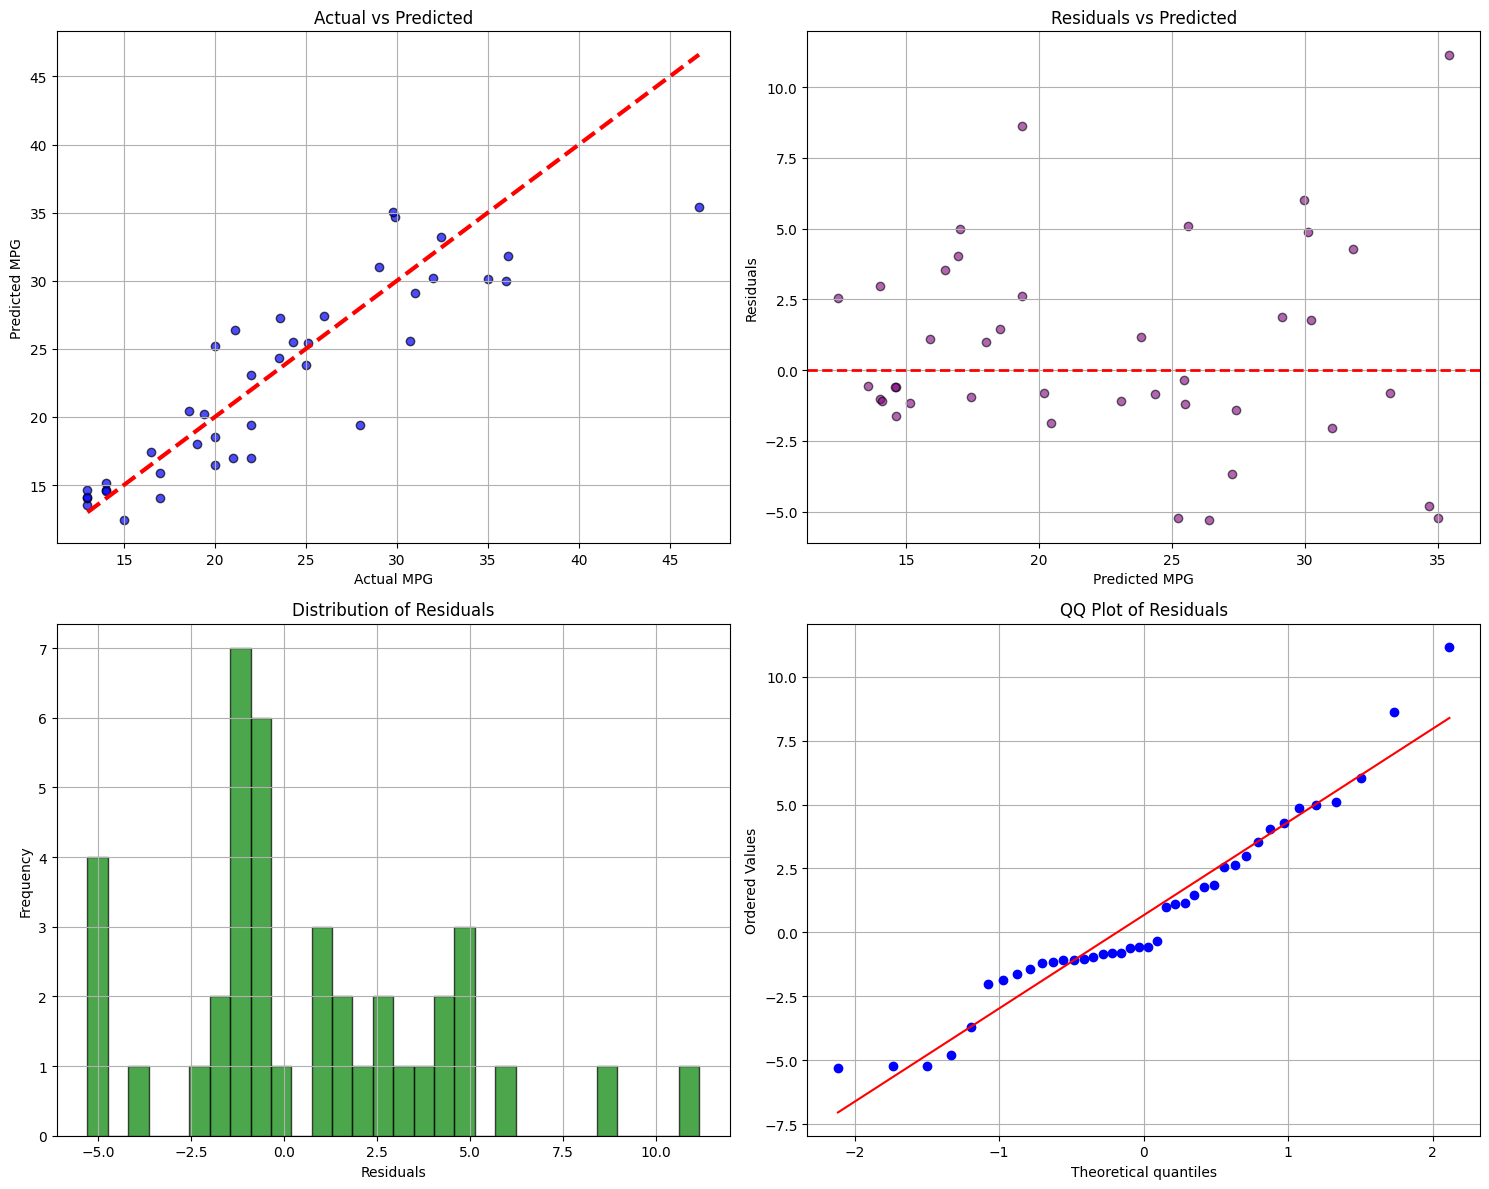

In [ ]:
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np

# Assume these are already available:
# Actual_mpg, Predicted_mpg

# Compute Residuals
residuals = Actual_mpg - Predicted_mpg

# Create a 2x2 grid of plots
fig, axs = plt.subplots(2, 2, figsize=(15, 12))

# 1. Actual vs Predicted Plot
axs[0, 0].scatter(Actual_mpg, Predicted_mpg, color='blue', alpha=0.7, edgecolors='k')
axs[0, 0].plot([Actual_mpg.min(), Actual_mpg.max()], [Actual_mpg.min(), Actual_mpg.max()], 'r--', lw=3)
axs[0, 0].set_xlabel('Actual MPG')
axs[0, 0].set_ylabel('Predicted MPG')
axs[0, 0].set_title('Actual vs Predicted')
axs[0, 0].grid(True)

# 2. Residuals vs Predicted
axs[0, 1].scatter(Predicted_mpg, residuals, color='purple', alpha=0.6, edgecolors='k')
axs[0, 1].axhline(y=0, color='red', linestyle='--', linewidth=2)
axs[0, 1].set_xlabel('Predicted MPG')
axs[0, 1].set_ylabel('Residuals')
axs[0, 1].set_title('Residuals vs Predicted')
axs[0, 1].grid(True)

# 3. Histogram of Residuals
axs[1, 0].hist(residuals, bins=30, color='green', alpha=0.7, edgecolor='k')
axs[1, 0].set_xlabel('Residuals')
axs[1, 0].set_ylabel('Frequency')
axs[1, 0].set_title('Distribution of Residuals')
axs[1, 0].grid(True)

# 4. QQ Plot of Residuals
stats.probplot(residuals, dist="norm", plot=axs[1, 1])
axs[1, 1].set_title('QQ Plot of Residuals')
axs[1, 1].grid(True)

# Adjust layout
plt.tight_layout()
plt.show()


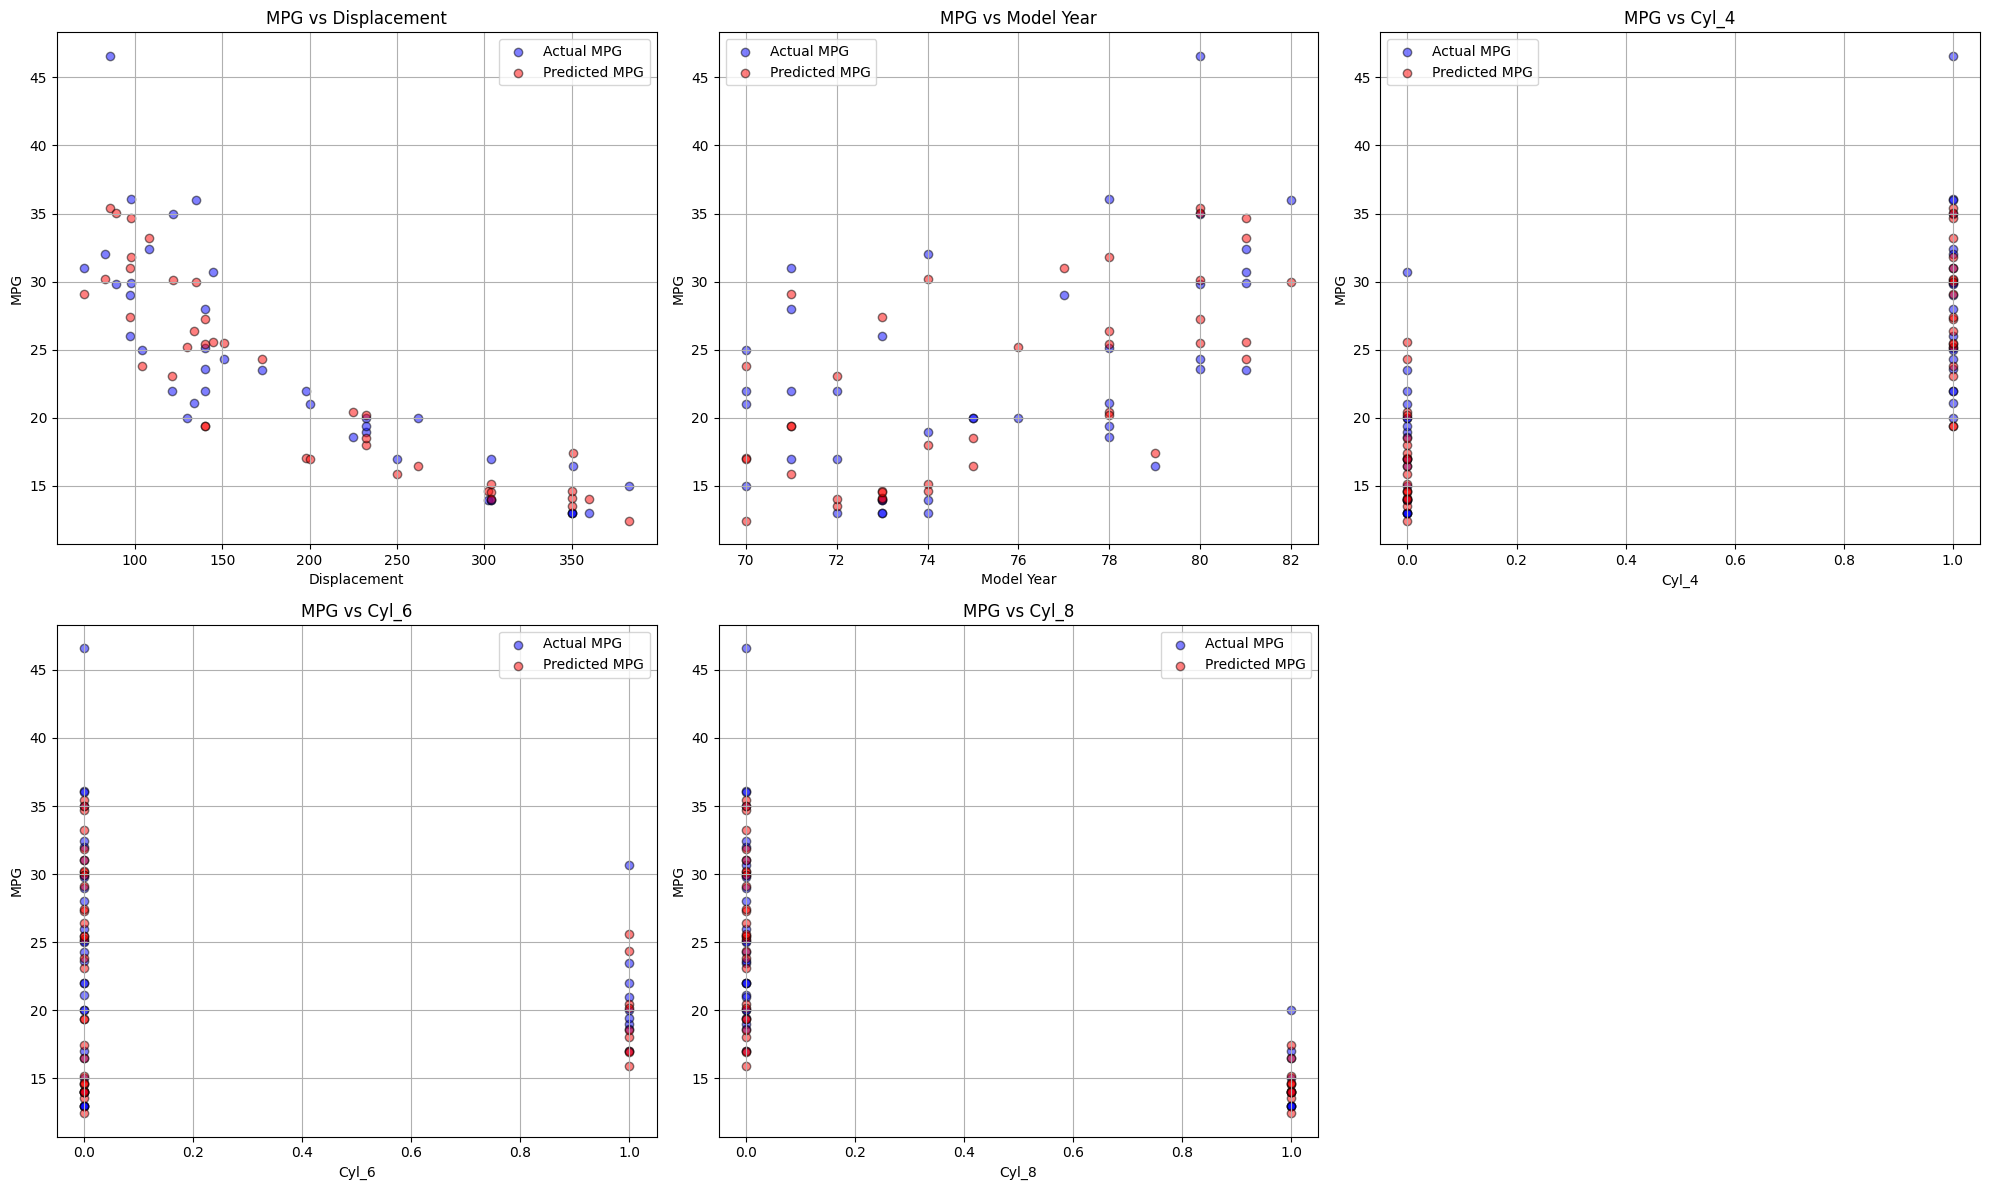

In [ ]:
import matplotlib.pyplot as plt

# Features and Names
feature_list = [X1_test, X2_test, X3_test, X4_test, X5_test]
feature_names = ['Displacement', 'Model Year', 'Cyl_4', 'Cyl_6', 'Cyl_8']

# Set up subplots
fig, axs = plt.subplots(2, 3, figsize=(20, 12))
axs = axs.flatten()

for i, (feature_data, feature_name) in enumerate(zip(feature_list, feature_names)):
    # Scatter Actual
    axs[i].scatter(feature_data, Actual_mpg, color='blue', alpha=0.5, edgecolors='k', label='Actual MPG')

    # Scatter Predicted
    axs[i].scatter(feature_data, Predicted_mpg, color='red', alpha=0.5, edgecolors='k', label='Predicted MPG')

    axs[i].set_xlabel(feature_name)
    axs[i].set_ylabel('MPG')
    axs[i].set_title(f'MPG vs {feature_name}')
    axs[i].legend()
    axs[i].grid(True)

# Remove empty plot if exists
if len(feature_list) < len(axs):
    fig.delaxes(axs[-1])

plt.tight_layout()
plt.show()


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


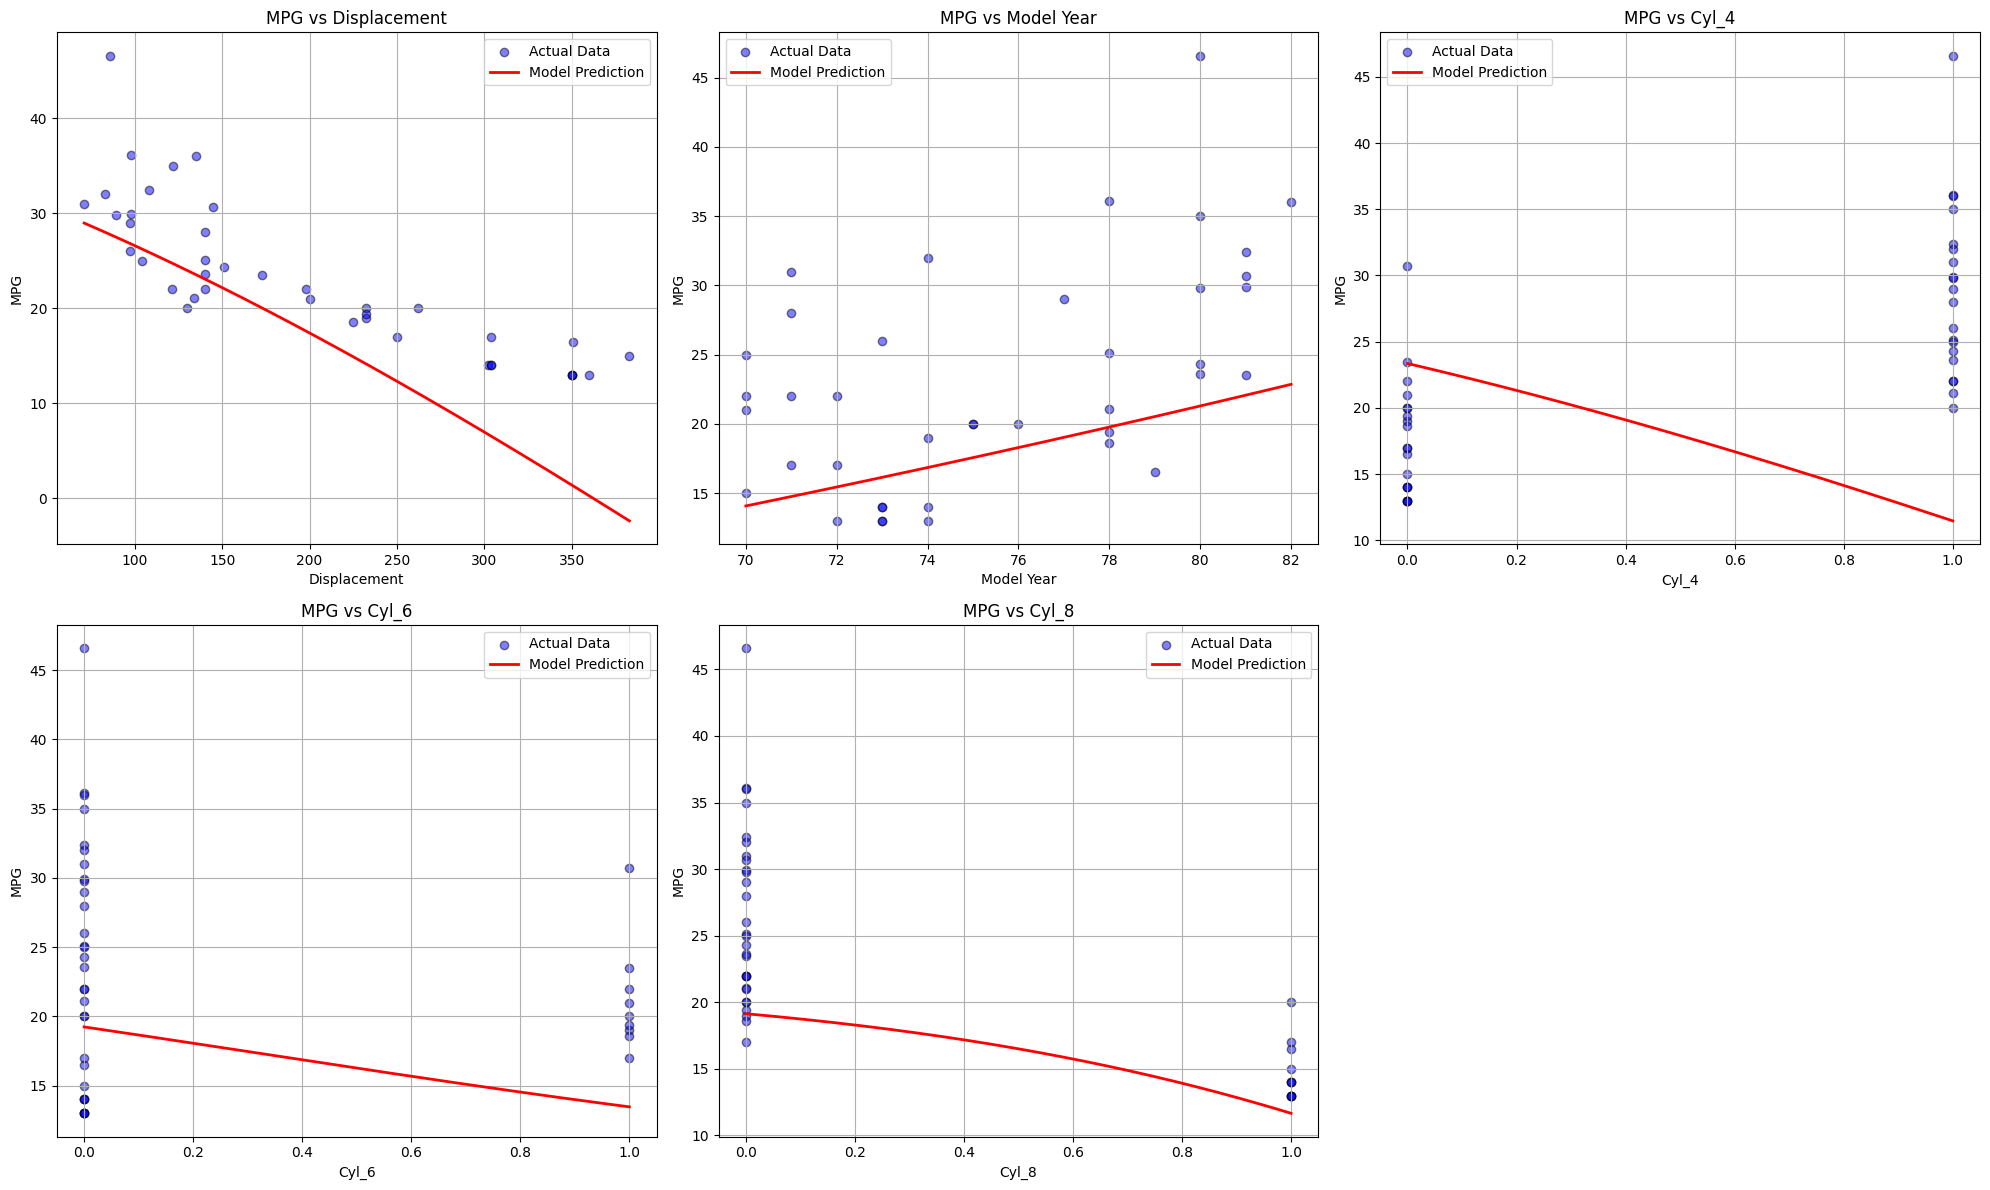

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Features and Names
feature_list = [X1_test, X2_test, X3_test, X4_test, X5_test]
feature_names = ['Displacement', 'Model Year', 'Cyl_4', 'Cyl_6', 'Cyl_8']

# Number of points for smooth prediction line
num_points = 300

# Set up subplots
fig, axs = plt.subplots(2, 3, figsize=(20, 12))
axs = axs.flatten()

for i, (feature_data, feature_name) in enumerate(zip(feature_list, feature_names)):
    # Prepare feature grid
    feature_range = np.linspace(feature_data.min(), feature_data.max(), num_points)

    # Prepare input for model prediction
    # Keep other features at their mean values
    mean_values = [np.mean(X1_test), np.mean(X2_test), np.mean(X3_test), np.mean(X4_test), np.mean(X5_test)]
    X_grid = np.tile(mean_values, (num_points, 1))
    X_grid[:, i] = feature_range  # Vary only current feature

    # Apply same Polynomial, Scaling, PCA as original preprocessing
    X_poly_grid = poly.transform(X_grid)
    X_poly_normalized_grid = scaler.transform(X_poly_grid)
    X_pca_grid = pca.transform(X_poly_normalized_grid)

    # Predict
    y_pred_grid = model.predict(X_pca_grid).flatten()

    # Scatter actual data
    axs[i].scatter(feature_data, Actual_mpg, color='blue', alpha=0.5, edgecolors='k', label='Actual Data')

    # Line prediction
    axs[i].plot(feature_range, y_pred_grid, color='red', linewidth=2, label='Model Prediction')

    axs[i].set_xlabel(feature_name)
    axs[i].set_ylabel('MPG')
    axs[i].set_title(f'MPG vs {feature_name}')
    axs[i].legend()
    axs[i].grid(True)

# Remove the empty subplot if exists
if len(feature_list) < len(axs):
    fig.delaxes(axs[-1])

plt.tight_layout()
plt.show()


In [ ]:
def predict_mpg(cylinders, displacement, model_year):
    """
    Predicts MPG given cylinders, displacement, and model year.
    Assumes model and preprocessing (poly, scaler, pca) are already defined.
    """

    # --- 1. One-hot encode cylinders (based on training logic)
    cyl_4 = 1 if cylinders == 4 else 0
    cyl_6 = 1 if cylinders == 6 else 0
    cyl_8 = 1 if cylinders == 8 else 0

    # --- 2. Create input array
    input_features = np.array([[displacement, model_year, cyl_4, cyl_6, cyl_8]])

    # --- 3. Apply same transformations (PolynomialFeatures -> StandardScaler -> PCA)
    input_poly = poly.transform(input_features)
    input_scaled = scaler.transform(input_poly)
    input_pca = pca.transform(input_scaled)

    # --- 4. Predict
    mpg_pred = model.predict(input_pca).flatten()[0]

    return mpg_pred


# Example: Predict MPG
predicted_mpg = predict_mpg(cylinders=4, displacement=91, model_year=76)
print(f"Predicted MPG: {predicted_mpg:.2f}")
